In [98]:
using Revise, Plots, FFTW, LinearAlgebra, LaTeXStrings, Random, Distributions

In [99]:
includet("../src/SparseSpikes.jl")
using .SparseSpikes

Define ground truth amplitudes and positions

In [100]:
domain = [0, 1]

x0 = [0.2, 0.35, 0.65]
a0 = [1.0, 1.0, -1.0]

μ0 = DiscreteMeasure(x0, a0)

DiscreteMeasure([0.2, 0.35, 0.65], [1.0, 1.0, -1.0], 1, 3)

In [101]:
# Define the number of Fourier coefficients
fc = 4
n = 2fc + 1

# Define noise level
noise_level = 0.1

# Seed for noise
Random.seed!(12)

TaskLocalRNG()

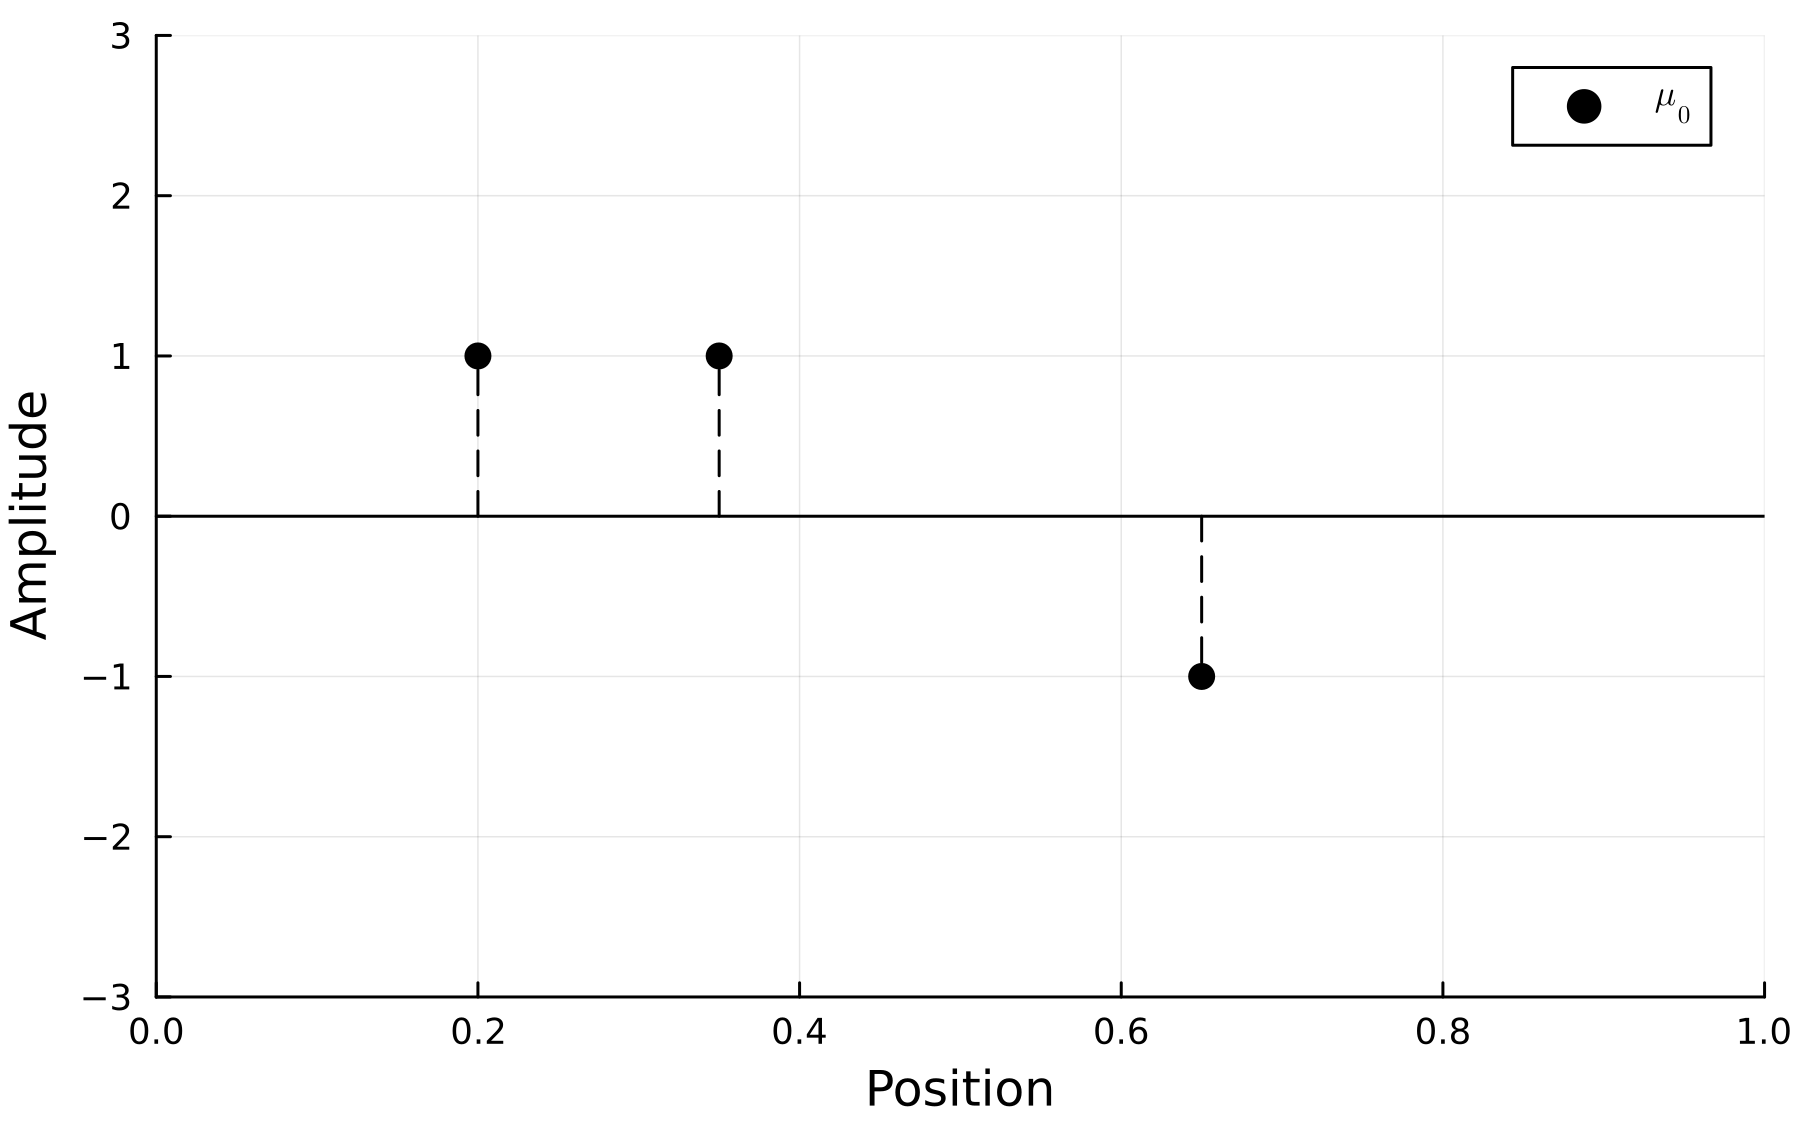

In [102]:
# Define the plot
num_points = 1000
plt_grid = range(domain..., length=(num_points + 1))
plot_size = (400, 250) .* 1.5
plt = plot(xlims=extrema(domain), ylims=(-3, 3), xlabel="Position", ylabel="Amplitude", legend=:topright, size=plot_size, dpi=300)
hline!(plt, [0], linestyle=:solid, color=:black, label="")

plot!(plt, bg=:White)

plt_spikes = deepcopy(plt)
plot!(plt_spikes, μ0.x, μ0.a, seriestype=:scatter, color=:black, label=L"μ_0", marker=:circle, markersize=5, markerstrokewidth=0)
for (xi, ai) in zip(μ0.x, μ0.a)
    plot!(plt_spikes, [xi, xi], [0, ai], linestyle=:dash, color=:black, label="")
end
plt_spikes

In [103]:
# ops = fourier_operators_1D(fc, plt_grid)
ops = gaussian_operators_1D(0.08, plt_grid)

Operators(var"#ϕ#28"{var"#gauss1D#27"{StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}, Float64}, Int64}(var"#gauss1D#27"{StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}, Float64}(0.0:0.001:1.0, 156.25), 1001), var"#Φ#29"{var"#ϕ#28"{var"#gauss1D#27"{StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}, Float64}, Int64}}(var"#ϕ#28"{var"#gauss1D#27"{StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}, Float64}, Int64}(var"#gauss1D#27"{StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}, Float64}(0.0:0.001:1.0, 156.25), 1001)), var"#adjΦ#30"{StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}, var"#adjΦ#26#31"{var"#ϕ#28"{var"#gauss1D#27"{StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}, Float64}, Int64}}}(0.0:0.001:1.0, var"#

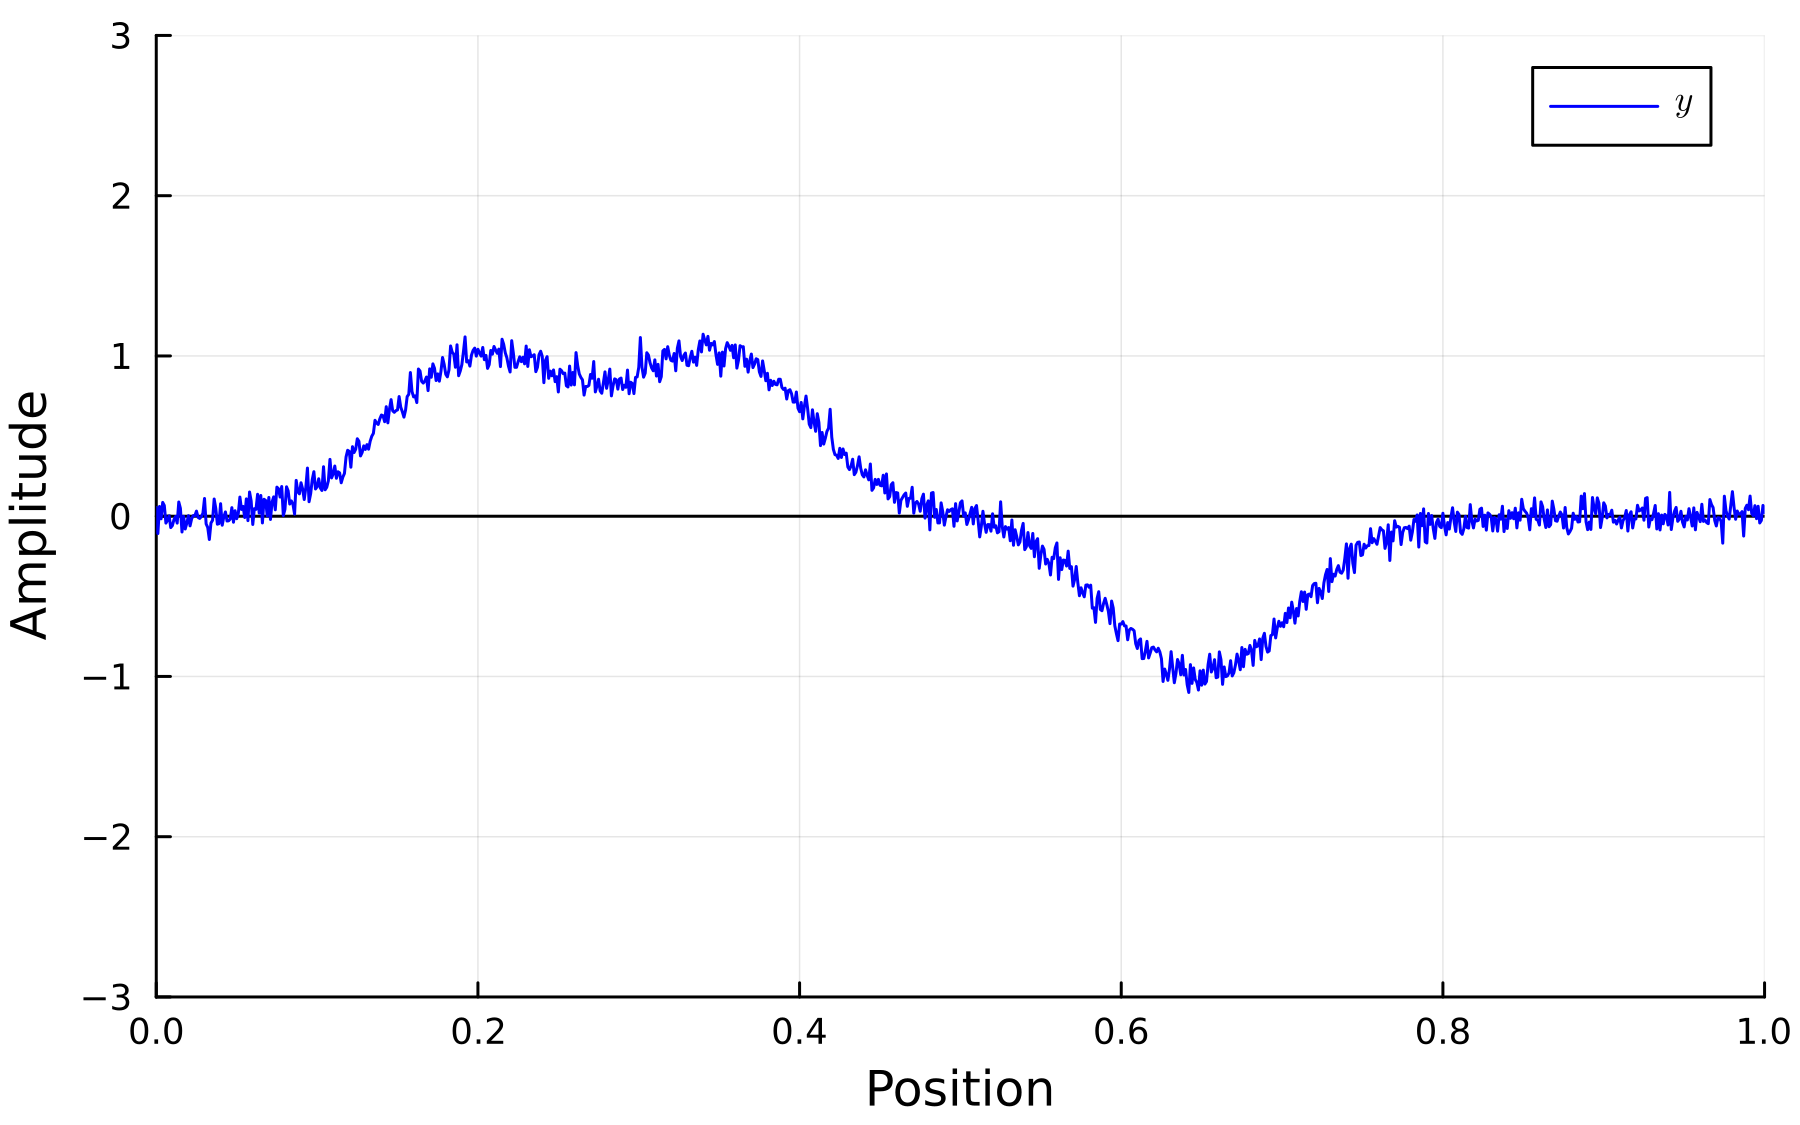

In [104]:
# Calculate the observation y0 = Φμ0
y0 = ops.Φ(x0, a0)

# Add noise to the observation y = y0 + w
sigma = noise_level * norm(y0)
w = randn(length(y0))
w = w / norm(w) * sigma
y = y0 + w

plt_obs = deepcopy(plt)

# plot!(plt_obs, plt_grid, y0, label=L"Φ^{\ast}y_0", color=:black, linestyle=:dash)
# plot!(plt_obs, plt_grid, y, label=L"Φ^{\ast}y", color=:blue)
# plot!(plt_obs, plt_grid, y0, label=L"y_0", color=:black, linestyle=:dash)
plot!(plt_obs, plt_grid, y, label=L"y", color=:blue)
# hline!(plt_obs, [1, -1], linestyle=:dash, color=:black, label="")

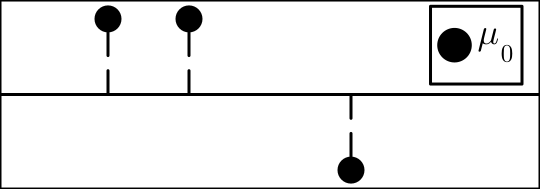

In [105]:
using Plots.Measures
plot!(plt_spikes, yrange=(-1.25, 1.25), grid=:none, ticks=:none, ylabel="", xlabel="", frame=:box, margins=-2mm, size=(200, 70) .* 0.9)#, bg=Colors.RGB(248 / 255, 245 / 255, 247 / 255))

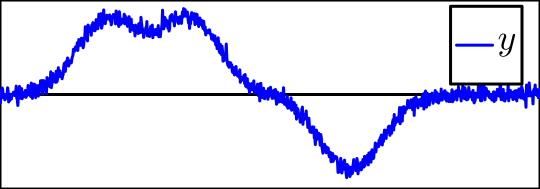

In [106]:
using Plots.Measures
plot!(plt_obs, yrange=(-1.25, 1.25), grid=:none, ticks=:none, ylabel="", xlabel="", frame=:box, margins=-2mm, size=(200, 70) .* 0.9)#, bg=Colors.RGB(248 / 255, 245 / 255, 247 / 255))

In [107]:
savefig(plt_spikes, "../figures/1D/Spikes.svg")
savefig(plt_obs, "../figures/1D/Observations.svg")

"c:\\Users\\ladis\\OneDrive - University of Warwick\\Year 4\\Super resolution\\Codes\\SparseSpikes\\figures\\1D\\Observations.svg"